In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.to_csv('model_evaluation_auto.csv')

In [5]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


#### Install libraries for plotting

In [6]:
! pip install ipywidgets

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual

### Part 1: Training and Testing

In [12]:
y_data = df['price']

In [13]:
x_data = df.drop('price', axis = 1)
x_data.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1


#### Now we randomly split our data into training and testing data using the function train_test_split.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=1)

In [20]:
print("number of training samples:", x_train.shape)
print("number of test samples:", x_test.shape)

number of training samples: (140, 20)
number of test samples: (61, 20)


### Question1: Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train_1" , "x_test_1", "y_train_1" and "y_test_1".

In [23]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.4, random_state= 0)

print(x_train1.shape[0])
print(x_test1.shape[0])
print(y_train1.shape[0])
print(y_test1.shape[0])

120
81
120
81


####  create a Linear Regression object:

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [27]:
lr.fit(x_train[['horsepower']], y_train)

LinearRegression()

#### Calculate the R^2 on train & test data:

In [28]:
lr.score(x_test[['horsepower']], y_test)

0.6287485044222196

In [29]:
lr.score(x_train[['horsepower']], y_train)

0.6628063120233265

#### R^2 is much smaller using the test data.

### Question2: Find the R^2 on the test data using 40% of the data for training data

In [32]:
lr1 = LinearRegression()
lr1.fit(x_train1[['horsepower']], y_train1)

lr1.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Let's go over several methods that you can use for Cross-validation.

#### Cross-validation Score

In [33]:
from sklearn.model_selection import cross_val_score

In [36]:
rcross = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2; each element in the array has the average R^2 value in the fold:

In [37]:
rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

We can calculate the average and standard deviation of our estimate:

In [39]:
print("The mean of the folds are:", rcross.mean(), "and the standard deviation is:", rcross.std())

The mean of the folds are: 0.522009915042119 and the standard deviation is: 0.2911839444756029


We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.

In [40]:
-1 + cross_val_score(lr, x_data[['horsepower']], y_data, cv=4, scoring = 'neg_mean_squared_error')

array([-20254143.84026704, -43745494.2650517 , -12539631.34014931,
       -17561928.72247591])

### Question 3: Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower as a feature :

In [41]:
rcross_q3 = cross_val_score(lr, x_data[['horsepower']], y_data, cv=2)
rcross_q3

array([0.59015621, 0.44319613])

In [42]:
print("The mean R-square error is:", rcross_q3.mean())

The mean R-square error is: 0.5166761697127429


In [44]:
rcross_q3[1:2]

array([0.44319613])

You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold for testing and the other folds are used for training. First import the function:

In [46]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lr, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Part 2: Overfitting, Underfitting and Model Selection

Let's create Multiple linear regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [48]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

#### Prediction using training & test data:

In [51]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([29846.60235605,  6884.07996697,  6770.88556096,  9674.82900088,
         589.60207942])

In [52]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11464.00435188,  5969.22232769, 11274.27750732,  6781.39943371,
       15787.13024319])

##### perform some model evaluation using our training and testing data separately. First we import the seaborn and matplotlibb library for plotting.

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Functions for Plotting:

In [73]:
def DistributionPlot(act_target, pred_target, act_name, pred_name, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(act_target, hist=False, color="r", label = act_name)
    ax2 = sns.distplot(pred_target, hist=False, color="b", label = pred_name, ax = ax1)
    
    plt.title(Title)
    plt.xlabel("Price in dollars")
    plt.ylabel("Proportion of cars")
    
    plt.show()
    plt.close()

C:\Users\sspnia\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sspnia\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


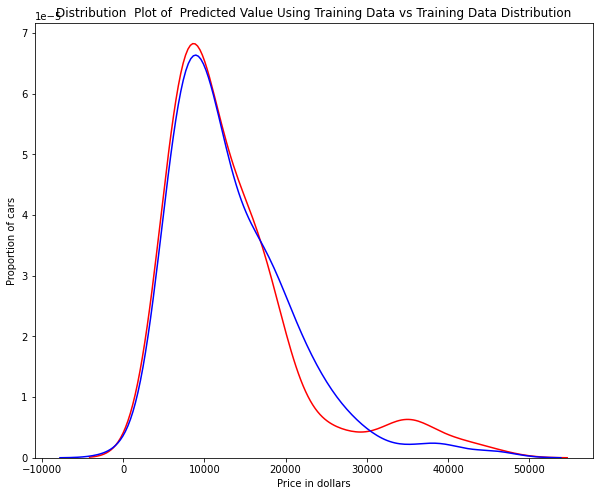

In [78]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\sspnia\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sspnia\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


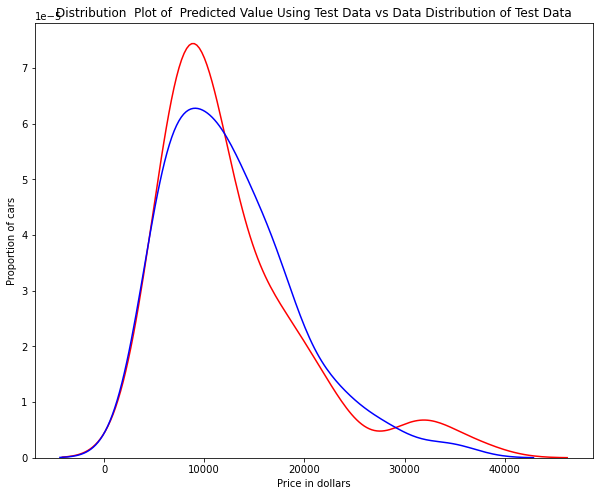

In [77]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

#### see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [79]:
from sklearn.preprocessing import PolynomialFeatures

#### Overfitting

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state=0) 

print(x_train.shape)
print(y_train.shape)



(110, 20)
(110,)


#### perform a degree 5 polynomial transformation on the feature 'horse power'.

In [82]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

pr

PolynomialFeatures(degree=5)

In [83]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [92]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.70501896,  7308.02845162, 12213.7843307 , 18893.19108677,
       19995.88963424])

In [93]:
print("Predicted values:", yhat[0:5])
print("Actual Values:", y_test[0:5].values)

Predicted values: [ 6728.70501896  7308.02845162 12213.7843307  18893.19108677
 19995.88963424]
Actual Values: [ 6295. 10698. 13860. 13499. 15750.]


In [94]:
def polyplot(x_train, x_test, y_train, y_test, lr, poly_transform):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))
    
    xmax = max([x_train.values.max(), x_test.values.max()])
    xmin = min([x_train.values.min(), x_test.values.min()])
    
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(x_train, y_train, 'ro', label = 'Training Data')
    plt.plot(x_test, y_test, 'go', label = 'Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label = "Predicted Function")
    
    plt.ylim([-10000, 60000])
    plt.ylabel('price')
    plt.legend()

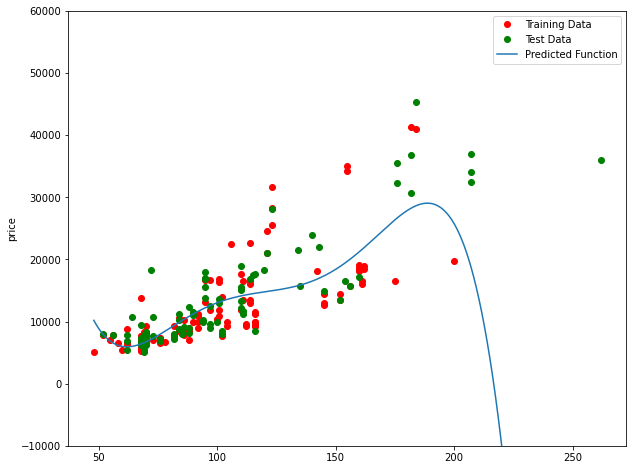

In [95]:
polyplot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

#### R^2 of the training data:

In [97]:
poly.score(x_train_pr, y_train)

0.5567716902635091

#### R^2 of the test data:

In [98]:
poly.score(x_test_pr, y_test)

-29.871418859187518

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

In [99]:
Rsqu_test = []

order = [1,2,3,4]

for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    poly = LinearRegression()
    
    poly.fit(x_train_pr, y_train)
    
    Rsqu_test.append(poly.score(x_test_pr, y_test))
    

In [100]:
Rsqu_test

[0.7325101750243117, 0.7405858710699834, 0.7406204232772, 0.40639663699026196]

Text(3, 0.75, 'Maximum R^2')

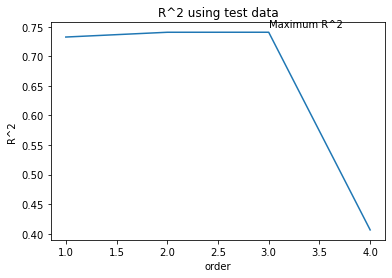

In [104]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title("R^2 using test data")

plt.text(3, 0.75, 'Maximum R^2')

In [105]:
def sample_function(order, testdata):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = testdata, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    polyplot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [107]:
interact(sample_function, order=(0,6,1), testdata=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.sample_function(order, testdata)>

### Question 4a: We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two?

In [108]:
pr1 = PolynomialFeatures(degree=2)
pr1

PolynomialFeatures()

### Question 4b: Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform" ?

In [111]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

### Question 4c: How many dimensions does the new feature have? Hint: use the attribute "shape"

In [112]:
x_train_pr1.shape

(110, 15)

### Question 4d: Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features?

In [113]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

### Question 4e: Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted output vs the test data?

C:\Users\sspnia\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sspnia\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


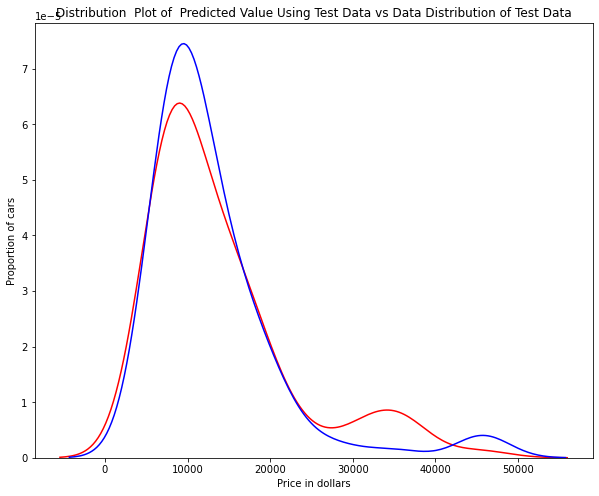

In [116]:
yhat1 = poly1.predict(x_test_pr1)
yhat1[0:5]

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat1,"Actual Values (Test)","Predicted Values (Test)",Title)

### Question 4f: Using the distribution plot above, explain in words about the two regions were the predicted prices are less accurate than the actual prices

Ans: The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

### Part 3: Ridge regression

In [118]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [119]:
from sklearn.linear_model import Ridge

In [122]:
RidgeModel = Ridge(alpha=0.1)

In [123]:
RidgeModel.fit(x_train_pr, y_train)

C:\Users\sspnia\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

In [126]:
yhat = RidgeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


In [133]:
Rsqu_test = []
Rsqu_train = []
alphas = 10 * np.array(range(0,1000))
for alpha in alphas:
    RidgeModel = Ridge(alpha = alpha)
    RidgeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RidgeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RidgeModel.score(x_train_pr, y_train))

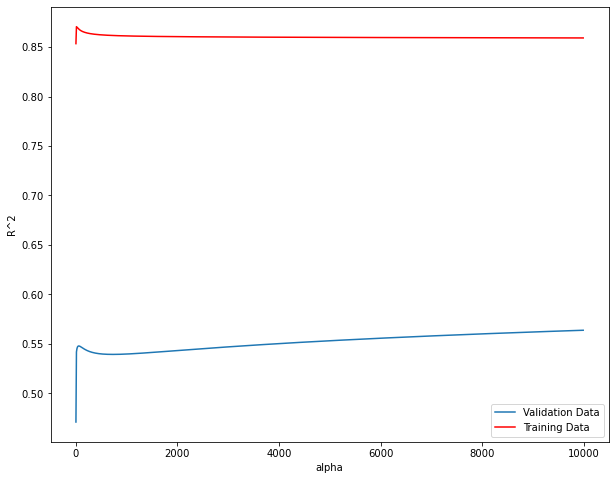

In [140]:
width = 10
height = 8
plt.figure(figsize=(width, height))

plt.plot(alphas, Rsqu_test, label = 'Validation Data')
plt.plot(alphas, Rsqu_train, 'r', label = 'Training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()
plt.close()

### Question 5: Perform Ridge regression and calculate the R^2 using the polynomial features, use the training data to train the model and test data to test the model. The parameter alpha should be set to 10.

In [141]:
RidgeModel = Ridge(alpha=10)
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_test_pr, y_test)

0.5418576440207269

### Part 4: Grid Search

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [163]:
RR=Ridge()
RR

Ridge()

In [168]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

NameError: name 'Grid1' is not defined

In [169]:
BestRR=Grid1.best_estimator_
BestRR

NameError: name 'Grid1' is not defined

In [170]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

NameError: name 'BestRR' is not defined

### Question 6: Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters

In [173]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
print(Grid2.best_estimator_)

Ridge(alpha=0.1, normalize=True)
